# 205229118
# Mahalakshmi S

# Lab 12. Analysing real time datasets using networkx package

## Exercise 1: Modelling road network of Indian cities

### 1. Import networkx and matplotlib libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

### 2. Initialise an Undirected Null graph and make a list of cities and make these cities as nodes

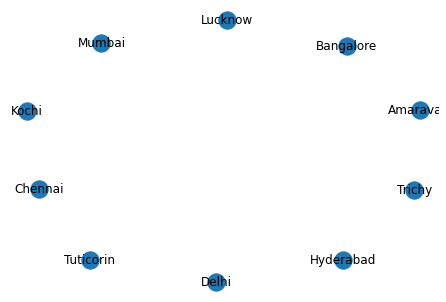

In [3]:
G = nx.Graph() #Undirected NULL graph
#G = nx.DiGraph() #Directed Graph
cities = ['Delhi', 'Trichy', 'Mumbai', 'Tuticorin', 'Chennai', 'Kochi', 'Hyderabad', 'Bangalore', 'Lucknow', 'Amaravati']
for city in cities:
    G.add_node(city)
nx.draw(G, with_labels=1)
plt.show()

In [4]:
import numpy as np
costs = [np.random.randint(50, 1000) for x in range(10) ]
print (costs)
print (len(costs))
print ("Edges : ", G.number_of_edges())
print ("Nodes : ", G.number_of_nodes())

[243, 340, 714, 171, 705, 857, 641, 594, 732, 780]
10
Edges :  0
Nodes :  10


### 3. Plot the cities

In [5]:
from numpy.random import choice

[('Delhi', 'Trichy'), ('Mumbai', 'Lucknow'), ('Mumbai', 'Kochi'), ('Mumbai', 'Hyderabad'), ('Tuticorin', 'Hyderabad'), ('Chennai', 'Amaravati'), ('Chennai', 'Bangalore'), ('Kochi', 'Hyderabad'), ('Kochi', 'Lucknow'), ('Hyderabad', 'Bangalore')]


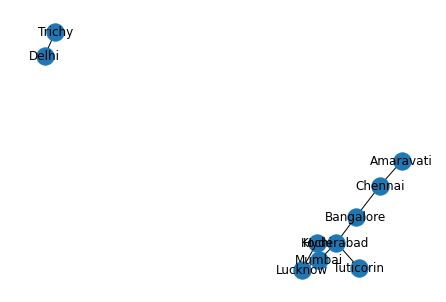

In [6]:
#Addding 10 edges to the graph
while(G.number_of_edges() != 10):
    city1 = choice(G.nodes())
    city2 = choice(G.nodes())
    wt = choice(costs)#selecting random costs
    
    if city1 != city2 and G.has_edge(city1, city2) == 0:
        G.add_edge(city1, city2, weight = wt)
print (G.edges())
nx.draw(G, with_labels=1)
plt.show()

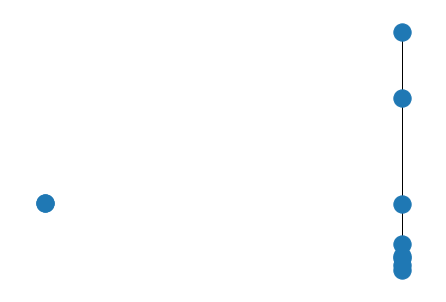

In [7]:
pos = nx.spectral_layout(G)
nx.draw(G, pos)
plt.show()

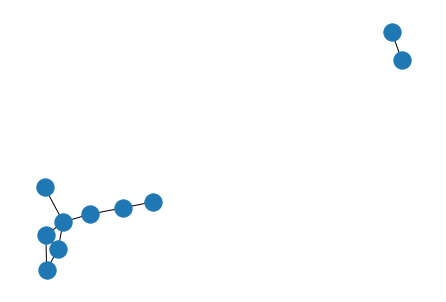

In [8]:
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

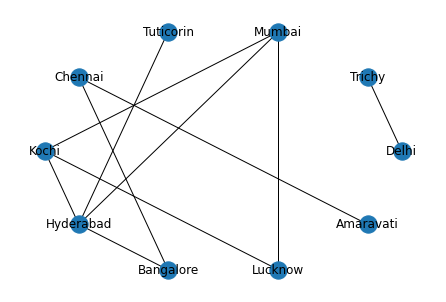

In [9]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

### 4.	Create edges among the cities and create weights for the edges 

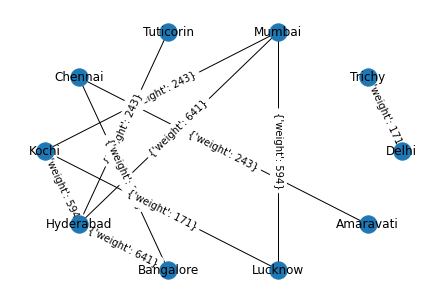

In [10]:
#Visulaising edge weights
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [11]:
print (nx.is_connected(G))

False


In [12]:
for u in G.nodes():
    for v in G.nodes():
        print (u, v, nx.has_path(G, u, v))

Delhi Delhi True
Delhi Trichy True
Delhi Mumbai False
Delhi Tuticorin False
Delhi Chennai False
Delhi Kochi False
Delhi Hyderabad False
Delhi Bangalore False
Delhi Lucknow False
Delhi Amaravati False
Trichy Delhi True
Trichy Trichy True
Trichy Mumbai False
Trichy Tuticorin False
Trichy Chennai False
Trichy Kochi False
Trichy Hyderabad False
Trichy Bangalore False
Trichy Lucknow False
Trichy Amaravati False
Mumbai Delhi False
Mumbai Trichy False
Mumbai Mumbai True
Mumbai Tuticorin True
Mumbai Chennai True
Mumbai Kochi True
Mumbai Hyderabad True
Mumbai Bangalore True
Mumbai Lucknow True
Mumbai Amaravati True
Tuticorin Delhi False
Tuticorin Trichy False
Tuticorin Mumbai True
Tuticorin Tuticorin True
Tuticorin Chennai True
Tuticorin Kochi True
Tuticorin Hyderabad True
Tuticorin Bangalore True
Tuticorin Lucknow True
Tuticorin Amaravati True
Chennai Delhi False
Chennai Trichy False
Chennai Mumbai True
Chennai Tuticorin True
Chennai Chennai True
Chennai Kochi True
Chennai Hyderabad True
Chenn

### 5.Build a road network from the created edges 

8


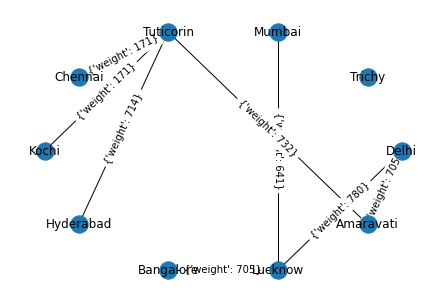

In [14]:
#write a module to create the road network
def create_network(cities, costs, numberOfLinks):
    G = nx.Graph()
    for city in cities:
        G.add_node(city)
    while(G.number_of_edges() < numberOfLinks):
        city1 = choice(G.nodes())
        city2 = choice(G.nodes())
        if city1 != city2 and G.has_edge(city1, city2) == 0:
            G.add_edge(city1, city2, weight = choice(costs))
    return G
G = create_network(cities, costs, 8)
print (G.number_of_edges())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [15]:
G.add_edge('Tuticorin', 'Hyderabad', weight = choice(costs))
print (nx.dijkstra_path(G, 'Tuticorin', 'Hyderabad'))# source and destination
print (nx.dijkstra_path_length(G,'Tuticorin', 'Hyderabad'))

['Tuticorin', 'Hyderabad']
243


In [16]:
#single source shorest path
print (nx.single_source_dijkstra_path(G, 'Tuticorin'))# source
print (nx.single_source_dijkstra_path_length(G,'Tuticorin'))

{'Tuticorin': ['Tuticorin'], 'Chennai': ['Tuticorin', 'Chennai'], 'Hyderabad': ['Tuticorin', 'Hyderabad'], 'Amaravati': ['Tuticorin', 'Amaravati'], 'Kochi': ['Tuticorin', 'Kochi'], 'Delhi': ['Tuticorin', 'Amaravati', 'Delhi'], 'Lucknow': ['Tuticorin', 'Amaravati', 'Delhi', 'Lucknow'], 'Bangalore': ['Tuticorin', 'Amaravati', 'Delhi', 'Lucknow', 'Bangalore'], 'Mumbai': ['Tuticorin', 'Amaravati', 'Delhi', 'Lucknow', 'Mumbai']}
{'Tuticorin': 0, 'Chennai': 171, 'Kochi': 171, 'Hyderabad': 243, 'Amaravati': 732, 'Delhi': 1437, 'Lucknow': 2217, 'Mumbai': 2858, 'Bangalore': 2922}


## Connecting Trichy and Delhi

In [17]:
x = [0]
y = [99999999]
cnt  = 0
def make_random_road(cnt):
    cnt = cnt + 1
    city1 = choice(G.nodes())
    city2 = choice(G.nodes())
    wt = choice(costs)
    G.add_edge(city1, city2, weight = wt)
    try:
        distance = nx.dijkstra_path_length(G, 'Trichy', 'Delhi')
        x.append(cnt)
        y.append(distance)
        return cnt
    except:
        print (cnt, "Still no path....")
        x.append(cnt)
        y.append(99999999)
        cnt += 1
        make_random_road(cnt)

In [18]:
make_random_road(0)

1 Still no path....


In [19]:
print (nx.dijkstra_path(G, 'Delhi', 'Trichy'))
print (nx.dijkstra_path_length(G, 'Delhi', 'Trichy'))

['Delhi', 'Lucknow', 'Bangalore', 'Trichy']
1656


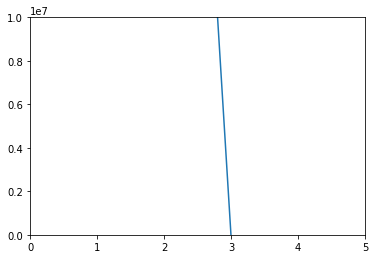

In [20]:
plt.plot(x, y)
plt.axis([0,5,0,10000000])
plt.show()

# Excercise 2

### Using txt file

In [21]:
#datasets.py
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist('facebook_combined.txt')

print (nx.info(G))

Graph with 4039 nodes and 88234 edges


In [22]:
print (nx.number_of_nodes(G))
print (nx.number_of_edges(G))
print (nx.is_directed(G))

4039
88234
False


### pajek

In [23]:
G2 = nx.read_pajek("football.net") #.net
print (nx.info(G2))
print (nx.number_of_nodes(G2))
print (nx.number_of_edges(G2))
print (nx.is_directed(G2))

MultiDiGraph with 35 nodes and 118 edges
35
118
True


In [24]:
G3 = nx.read_pajek("karate.paj") 
print (nx.info(G3))
print (nx.number_of_nodes(G3))
print (nx.number_of_edges(G3))
print (nx.is_directed(G3))

MultiGraph with 34 nodes and 78 edges
34
78
False


In [25]:
G4 = nx.read_graphml("wikipedia.graphml")
print (nx.info(G4))
print (nx.number_of_nodes(G4))
print (nx.number_of_edges(G4))
print (nx.is_directed(G4))

DiGraph with 921 nodes and 1081 edges
921
1081
True


DiGraph with 4 nodes and 5 edges
True


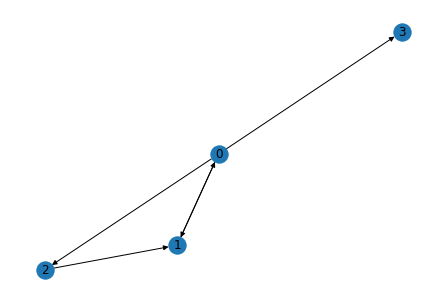

In [26]:
G5 = nx.read_gexf("data.gexf")
print (nx.info(G5))
print (nx.is_directed(G5))
nx.draw(G5,with_labels=1)
plt.show()


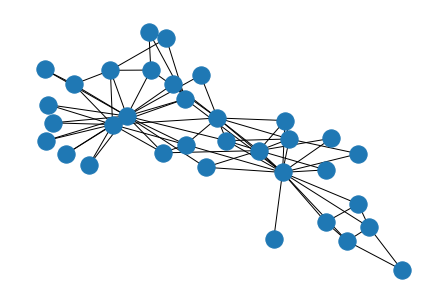

In [27]:
G6 = nx.read_gml('karate.gml',label='id')
nx.draw(G6)
plt.show()

MultiDiGraph with 35 nodes and 118 edges


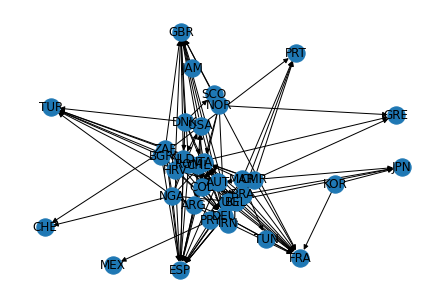

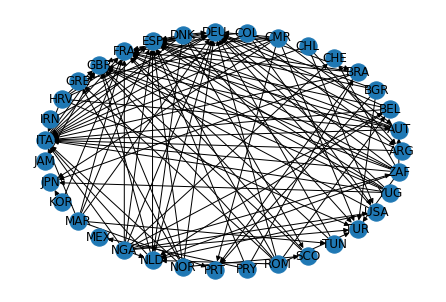

In [28]:
print (nx.info(G2))#football.net
nx.draw(G2, with_labels=1)
plt.show()
nx.draw_circular(G2, with_labels=1)
plt.show()

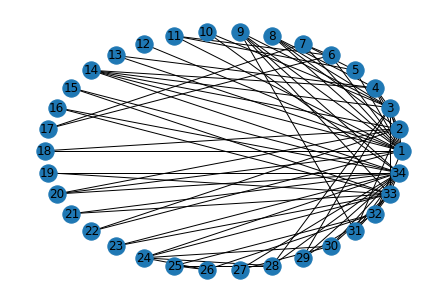

[(1, 16), (2, 9), (3, 10), (4, 6), (5, 3), (6, 4), (7, 4), (8, 4), (9, 5), (10, 2), (11, 3), (12, 1), (13, 2), (14, 5), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 3), (21, 2), (22, 2), (23, 2), (24, 5), (25, 3), (26, 3), (27, 2), (28, 4), (29, 3), (30, 4), (31, 4), (32, 6), (33, 12), (34, 17)]
dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])
Degree List :  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


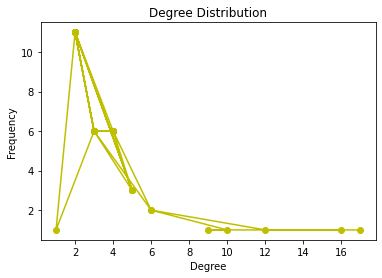

In [29]:
#Analysis of karate.gml G6
nx.draw_circular(G6, with_labels=1)
plt.show()
# Degree Distribution (degree and no. of nodes)
print (nx.degree(G6))
all_degree_list = dict(nx.degree(G6)).values()
print (all_degree_list)

def degree_distribution(G6):
    #finding unique factors
    degree_count = []
    deg_set = dict(nx.degree(G6)).values()
    unique_deg_list = list(deg_set)
    print ("Degree List : ", unique_deg_list)
    for i in unique_deg_list:
        x = list(all_degree_list).count(i)
        degree_count.append(x)
    plt.plot(unique_deg_list, degree_count, 'yo-')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    return
degree_distribution(G6) #Implies it follows power law degree distributiom
# power law - Only few nodes have higher degrees

Degree List :  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
unique degree list :  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
degree count :  [1, 1, 1, 2, 6, 6, 6, 6, 3, 11, 6, 1, 11, 3, 11, 11, 11, 11, 11, 6, 11, 11, 11, 3, 6, 6, 11, 6, 6, 6, 6, 2, 1, 1]


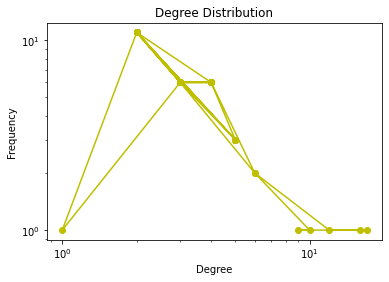

In [30]:
def degree_distribution(G):
    degree_count = []
    #finding unique factors
    deg_set = dict(nx.degree(G6)).values()
    unique_deg_list = list(deg_set)
    print ("Degree List : ", unique_deg_list)
    for i in unique_deg_list:
        x = list(all_degree_list).count(i)
        degree_count.append(x)
    print ("unique degree list : ", unique_deg_list)
    print ("degree count : ", degree_count)
    plt.loglog(unique_deg_list, degree_count, 'yo-')#plot between logx and logy
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    return
degree_distribution(G6)

## Density
 * density = number of edges present/Total edges possible
 * max edges = n (C) 2
 * simple graph -> density 0 to 1
 * null graph -> density = 0
 * complete graph -> density = 1
 * multi graph -> density >=0

In [31]:
G  = nx.complete_graph(100)
print (nx.density(G))
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
print (nx.density(G))

1.0
0


In [32]:
#density of karate
print (nx.density(G6)) #=> sparse graph

0.13903743315508021


## Clustering Coefficient
* clustering coef = number of direct friendships among neighbours / Total possible friendships among neighbours
* Avg clustering coef 

In [33]:
print (nx.clustering(G6))

{1: 0.15, 2: 0.3333333333333333, 3: 0.24444444444444444, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.5, 7: 0.5, 8: 1.0, 9: 0.5, 10: 0, 11: 0.6666666666666666, 12: 0, 13: 1.0, 14: 0.6, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 0.3333333333333333, 21: 1.0, 22: 1.0, 23: 1.0, 24: 0.4, 25: 0.3333333333333333, 26: 0.3333333333333333, 27: 1.0, 28: 0.16666666666666666, 29: 0.3333333333333333, 30: 0.6666666666666666, 31: 0.5, 32: 0.2, 33: 0.19696969696969696, 34: 0.11029411764705882}


In [34]:
for i in nx.clustering(G6).items():
    print (i)
print ("Avg clustering : ", nx.average_clustering(G6))

(1, 0.15)
(2, 0.3333333333333333)
(3, 0.24444444444444444)
(4, 0.6666666666666666)
(5, 0.6666666666666666)
(6, 0.5)
(7, 0.5)
(8, 1.0)
(9, 0.5)
(10, 0)
(11, 0.6666666666666666)
(12, 0)
(13, 1.0)
(14, 0.6)
(15, 1.0)
(16, 1.0)
(17, 1.0)
(18, 1.0)
(19, 1.0)
(20, 0.3333333333333333)
(21, 1.0)
(22, 1.0)
(23, 1.0)
(24, 0.4)
(25, 0.3333333333333333)
(26, 0.3333333333333333)
(27, 1.0)
(28, 0.16666666666666666)
(29, 0.3333333333333333)
(30, 0.6666666666666666)
(31, 0.5)
(32, 0.2)
(33, 0.19696969696969696)
(34, 0.11029411764705882)
Avg clustering :  0.5706384782076823


## Diameter
* diameter = max shortest path between any nodes in a network

In [35]:
print ("Diameter is", nx.diameter(G6))

Diameter is 5
